# An Exploding Rock (in the Pacific) 
## Sifting through the clouds to analyze the recent Kilauea Eruption

### The Never-ending Eruption ... 
The first time Kilauea erupted was in 1790. Since then, the volcano has been continuously 'active' , though the eruption rate diminished until 1924 when it began to increase again. Nevertheless, it has been no secret that Kilauea is, and has been since 1790, an active volcano that poses a threat to those around it. The recent eruption that began on May 3, 2018 should not have come as such a surprise as the media made it out to be. 

The purpose of my study was to add some truth the to hype that media was creating by using satellite imagery to assess and quantify vegetation change before and after the eruption. 

### Look at the Entire Picture & Examine the Full Story:
When studying a rock that is exploding in the pacific, there will be a lot of cloud disturbance resulting in a lot of data uncertainity. Multiple data sources should be incorporated. 

This lead me to also analyze pollution as another measure of the impact from the eruption, something the media probably should have placed more focus on in their coverage.

Another data set that would be interesting to incorporate into a study of volanic impact, is elevation change. Synthetic Aperture Radar (SAR) data would be helpful for this, though it is not wideley distributed at this time. 


In [1]:
import os
import pandas as pd
import geopandas as gpd
import rasterio as rio
import matplotlib.pyplot as plt
import matplotlib as mpl

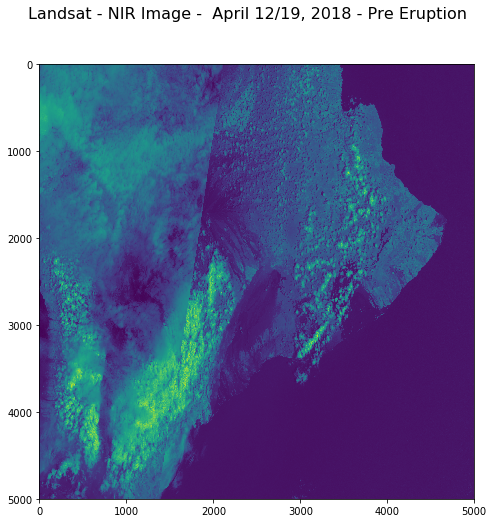

In [2]:
pre_nir_landsat_path = '/Users/shannonwhite/git/data/Landsat/outputsL/landsat_pre_nir.tif'
with rio.open(pre_nir_landsat_path) as scene1:
    landsat_pre = scene1.read()
    

fig,ax1=plt.subplots(figsize=(8,8))

im=ax1.imshow(landsat_pre[0])
plt.suptitle('Landsat - NIR Image -  April 12/19, 2018 - Pre Eruption ', fontsize=16)
plt.show()

## Sattelite Imagery (Landsat 8)
The above image has a lot of cloud cover which can alter values for vegetation change and analysis. In addition, the complete image is a composite of two images from two seperate dates : April 12 and April 19. Landsat satellite did not capture a complete scene for the area that was most affected by the eruption. As a result, I had to mosaic two images from two seperate dates to create a complete scene. 

### Sattelite Imagery and Pollution Data Collide
**Exploring sulfure dioxide emmissions prior to selecting a date for satellite imagery might be useful to find a scene that has the least amount of vog disturbance.**

What is interesting in the pre-eruption satellite image is that some of the clouds are clear and concise, while the area to the east of the image is more a representation of vog that is created from the volcano. Vog is a reaction that occurs when the sulfure dioxide emitted from the volcano reacts with the atmosphere and sunlight, creating volcanic fog, or "vog". 

This image correlates directly with the graph below showing the peak sulfure dioxide emmissions in 2018 for Hawaii. 

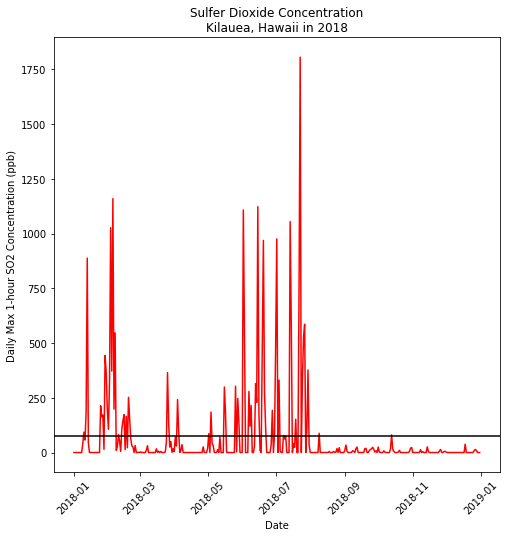

In [3]:
so2_datetime = pd.read_csv("/Users/shannonwhite/git/data/so22_ad_viz_plotval_data.csv",
                             parse_dates = ['Date'],
                             index_col = ['Date'])

fig,ax=plt.subplots(figsize=(8,8))

# add the x-axis and the y-axis to the plot
ax.plot(so2_datetime.index.values, 
        so2_datetime['Daily Max 1-hour SO2 Concentration'], 
        color = 'red')
ax.axhline(y=75.0, color='k', linestyle='-')
# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Daily Max 1-hour SO2 Concentration (ppb)",
       title="Sulfer Dioxide Concentration\nKilauea, Hawaii in 2018");

There was a slight peak in sulfur dioxide in April 2018 before the extreme peak begining in May, when the eruption took place. The first peak in April matches with the vog that is visible in the satellite image of the scene. 

There is very little sulfure dioxide emmitted in December of 2018, and the satellite image (below) for the post-scene is a much clearer image. 

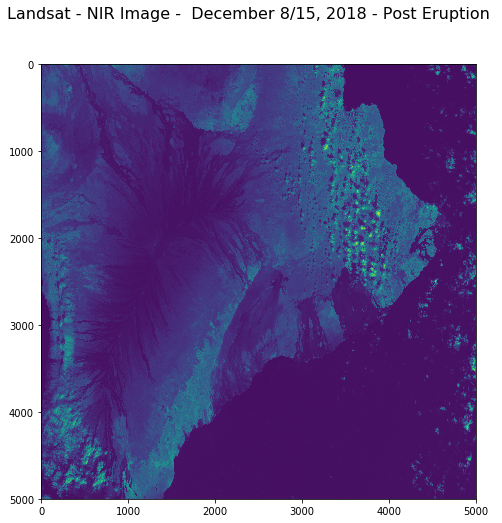

In [4]:
post_nir_landsat_path = '/Users/shannonwhite/git/data/Landsat/outputsL/landsat_post_nir.tif'
with rio.open(post_nir_landsat_path) as scene2:
    landsat_post = scene2.read()
    

fig,ax1=plt.subplots(figsize=(8,8))

im=ax1.imshow(landsat_post[0])
plt.suptitle('Landsat - NIR Image -  December 8/15, 2018 - Post Eruption ', fontsize=16)
plt.show()

## Pollution Data: 
### The air people were breathing was more hazardous than the flow of lava 

In addition to determining appropriate dates for satellite images, sulfure dioxide is a major pollutant that is dangerous for human health. 

High concentrations of SO2 can cause inflammation and irritation of the respiratory system, and can affect lung function, worsen asthma attacks, and worsen existing heart disease.

In 2010, EPA revised the primary SO2 National Ambient Air Quality Standards (NAAQS) by establishing a new 1-hour standard at a level of 75 parts per billion (ppb), indicated in the black line in the graph above. The graph shows all of the peaks being way higher than this standard. In fact, during the eruption, the highest concentration was **1806 ppb** on July 23, 2018 - 173% above the standard. 

The graph below also showes that four of the top five instances were recorded during the eruption (May - August).


In [5]:
so2_datetime.sort_values(by="Daily Max 1-hour SO2 Concentration", ascending = False).head()

,Source,Site ID,POC,Daily Max 1-hour SO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
Date,,,,,,,,,,,,,,,,,,,
2018-07-23,AQS,150010005.0,1.0,1806.0,ppb,200.0,Hawaii Volcanoes NP - Kilauea Visitors Center,23.0,96.0,42401.0,Sulfur dioxide,25900.0,"Hilo, HI",15.0,Hawaii,1.0,Hawaii,19.4308,-155.2578
2018-02-05,AQS,150010005.0,1.0,1160.0,ppb,200.0,Hawaii Volcanoes NP - Kilauea Visitors Center,23.0,96.0,42401.0,Sulfur dioxide,25900.0,"Hilo, HI",15.0,Hawaii,1.0,Hawaii,19.4308,-155.2578
2018-06-15,AQS,150010005.0,1.0,1123.0,ppb,200.0,Hawaii Volcanoes NP - Kilauea Visitors Center,23.0,96.0,42401.0,Sulfur dioxide,25900.0,"Hilo, HI",15.0,Hawaii,1.0,Hawaii,19.4308,-155.2578
2018-06-02,AQS,150010005.0,1.0,1108.0,ppb,200.0,Hawaii Volcanoes NP - Kilauea Visitors Center,23.0,96.0,42401.0,Sulfur dioxide,25900.0,"Hilo, HI",15.0,Hawaii,1.0,Hawaii,19.4308,-155.2578
2018-07-14,AQS,150010005.0,1.0,1055.0,ppb,200.0,Hawaii Volcanoes NP - Kilauea Visitors Center,23.0,96.0,42401.0,Sulfur dioxide,25900.0,"Hilo, HI",15.0,Hawaii,1.0,Hawaii,19.4308,-155.2578


Another hazardous pollutant emitted by volcanoes is particulate matter (PM), which becomes more hazardous as the particles get smaller. Particulate matter of 2.5μg/m3 (PM2.5) cannot be seen with a naked eye yet can be dangerous to human health.

Studies have found a close link between exposure to fine particles (PM2.5) and premature death from heart and lung disease. Fine particles are also known to trigger or worsen chronic disease such as asthma, heart attacks, bronchitis and other respiratory problems. A study published in the *Journal of the American Medical Association* suggests that long-term exposure to PM2.5 may lead to plaque deposits in arteries, causing vascular inflammation and a hardening of the arteries which can eventually lead to heart attack and stroke. 

The 24-hour concentration of PM2.5 is considered detrimental to health when it rises above 35.4 μg/m3, indicated by the black line on the graph below.

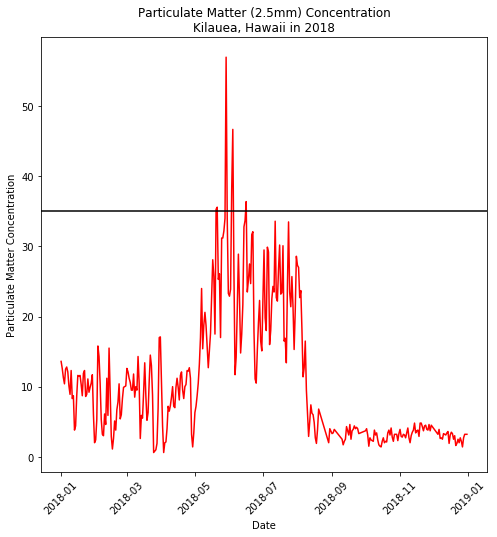

In [6]:
pm_datetime = pd.read_csv("/Users/shannonwhite/git/data/pm_ad_viz_plotval_data.csv",
                             parse_dates = ['Date'],
                             index_col = ['Date'])

fig,ax1=plt.subplots(figsize=(8,8))

# add the x-axis and the y-axis to the plot
ax1.plot(pm_datetime.index.values, 
        pm_datetime['Daily Mean PM2.5 Concentration'], 
        color = 'red')
ax1.axhline(y=35.0, color='k', linestyle='-')
# rotate tick labels
plt.setp(ax1.get_xticklabels(), rotation=45)


# set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Particulate Matter Concentration",
       title="Particulate Matter (2.5mm) Concentration\nKilauea, Hawaii in 2018");

The American Heart Association states that :

*“Exposure to PM greater than 2.5 μm in diameter (PM2.5) over a few hours to weeks can trigger cardiovascular disease-related mortality and nonfatal events; longer-term exposure (eg, a few years) increases the risk for cardiovascular mortality to an even greater extent than exposures over a few days and reduces life expectancy within more highly exposed segments of the population by **several months** to a few years.”*

The timeline for Kilauea's eruption in terms of PM2.5 shows dangerous levels (above 35.4 μg/m3) from May until August, about 3 months. This could be the begining of a reduced life expectancy - a matter that should have been covered more by the media. If pollution was ever mentioned by the media, it was overshadowed by homes being destroyed - an important matter, but quite materialisitic. Homes can be rebuilt, particulate matter cannot simply be extracted from your lungs. 

# In conlcusion, 

Studying vegetation using satellite imagery can be difficult in areas that have a lot of cloud disturbance. This can be even more complicated when a volcano is erupting and spewing out sulfur dioxide that reacts with the atmosphere and creates volcanic fog. It could be helpful to first analyze pollution data in order to determine a date for the scene that would be the most clear. However, cloud disturbance can create data uncertainty.

In addition, pollution data is a great measurement for impact from volcanos. I was able to find data for particulate matter and sulfur dioxide to analyze, however other important pollutants emmitted from volcanoes inlcude carbon dioxide, hydrogen sulfide, and hydrogen halides. This data is not only very impactful to human health, but also could add valuable insight into analysis of volcanic eruptions as a parallel to vegetation indexes - especially when data uncertainty exists. 



### Sources: 

* Info on [SO2] (//https://www.nps.gov/subjects/air/humanhealth-sulfur.htm)

* More info on [SO2 concentrations] (//https://www.epa.gov/criteria-air-pollutants/naaqs-table)

* Info on [Particulate Matter] (//https://secure-web.cisco.com/1QDUWEgvR2j71dbMN6414c_dMqqPpDVa40YDOIwirt91JMCSTCx4xWrWIYtBbts7vcO0jQ3fKTD0ekk6-Erlv7ZzulNWv21RON5RnQGbjoY0ZZpkU1mM0JI8E8v72xMa7NbdGh0CDOvyxdgYXyQ-jmnQsBZsLYOKFrYDCMdEEWHEEpARtT5UZUQCiWygd9V9XHwZLLl751NZu2GrDkNcwWYgXM2EPDamx9MaCPTJo5s_lzfrglWVpJQ2B6zGwIjZBY3B1INZFTgDrSCbjC51IqDC3pfK9p3aIdXYTkA_6Put53jyuQGdy-4wOS-5k3tQS98laMsZMrPK0_O64OnyqHys-E8OktLpCmbxCvNHZsdtOcB4MO6JZ4g-0pgAiM9ZqVkRyG-mhMBurzLbrPNCQqz0oHhH6blxu6zbBeLPMPB8RSrj9zvEC153aYOJ3Keap/https%3A%2F%2Fblissair.com%2Fwhat-is-pm-2-5.htm)
